In [ ]:
!nvidia-smi

Sun May 11 17:03:16 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d samuelcortinhas/apples-or-tomatoes-image-classification

Dataset URL: https://www.kaggle.com/datasets/samuelcortinhas/apples-or-tomatoes-image-classification
License(s): CC0-1.0
  0% 0.00/2.33M [00:00<?, ?B/s]
100% 2.33M/2.33M [00:00<00:00, 831MB/s]


In [4]:
!unzip /content/apples-or-tomatoes-image-classification.zip

Archive:  /content/apples-or-tomatoes-image-classification.zip
  inflating: test/apples/img_p1_111.jpeg  
  inflating: test/apples/img_p1_121.jpeg  
  inflating: test/apples/img_p1_127.jpeg  
  inflating: test/apples/img_p1_131.jpeg  
  inflating: test/apples/img_p1_133.jpeg  
  inflating: test/apples/img_p1_139.jpeg  
  inflating: test/apples/img_p1_14.jpeg  
  inflating: test/apples/img_p1_143.jpeg  
  inflating: test/apples/img_p1_15.jpeg  
  inflating: test/apples/img_p1_16.jpeg  
  inflating: test/apples/img_p1_29.jpeg  
  inflating: test/apples/img_p1_30.jpeg  
  inflating: test/apples/img_p1_33.jpeg  
  inflating: test/apples/img_p1_34.jpeg  
  inflating: test/apples/img_p1_36.jpeg  
  inflating: test/apples/img_p1_50.jpeg  
  inflating: test/apples/img_p1_52.jpeg  
  inflating: test/apples/img_p1_55.jpeg  
  inflating: test/apples/img_p1_68.jpeg  
  inflating: test/apples/img_p1_7.jpeg  
  inflating: test/apples/img_p1_70.jpeg  
  inflating: test/apples/img_p1_74.jpeg  
  infla

In [7]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [8]:
train_path = '/content/train'
valid_path = '/content/test'

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, MaxPooling2D

In [10]:
folders = glob('/content/train/*')
folders

['/content/train/apples', '/content/train/tomatoes']

In [11]:
num_of_class = len(folders)
num_of_class

2

In [12]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# view the structure of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,177,281 (42.64 MB)

 Trainable params: 11,177,281 (42.64 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 294 images belonging to 2 classes.


In [18]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 97 images belonging to 2 classes.


In [19]:
history = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 953ms/step - accuracy: 0.5193 - loss: 1.3728 - val_accuracy: 0.4433 - val_loss: 0.7312
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 331ms/step - accuracy: 0.4870 - loss: 0.7027 - val_accuracy: 0.5361 - val_loss: 0.6734
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 366ms/step - accuracy: 0.5277 - loss: 0.7171 - val_accuracy: 0.5979 - val_loss: 0.6704
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 329ms/step - accuracy: 0.6721 - loss: 0.6449 - val_accuracy: 0.6495 - val_loss: 0.6346
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 334ms/step - accuracy: 0.5615 - loss: 0.7192 - val_accuracy: 0.6186 - val_loss: 0.6643
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 327ms/step - accuracy: 0.6581 - loss: 0.6529 - val_accuracy: 0.6392 - val_loss: 0.6300
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 324ms/step - accuracy: 0.7022 - loss: 0.5991 - val_accuracy: 0.6495 - val_loss: 0.6111
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 352ms/step - accuracy: 0.7107 - loss: 0.5502 - val_accuracy: 

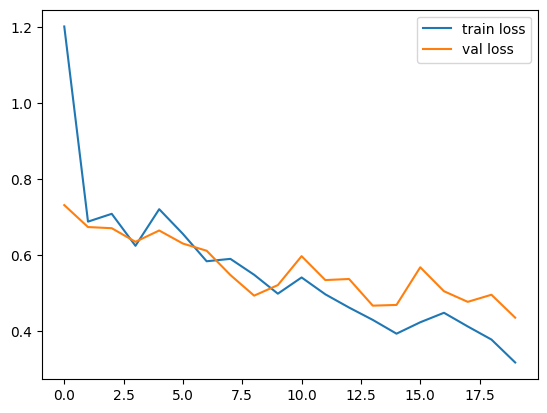

<Figure size 640x480 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

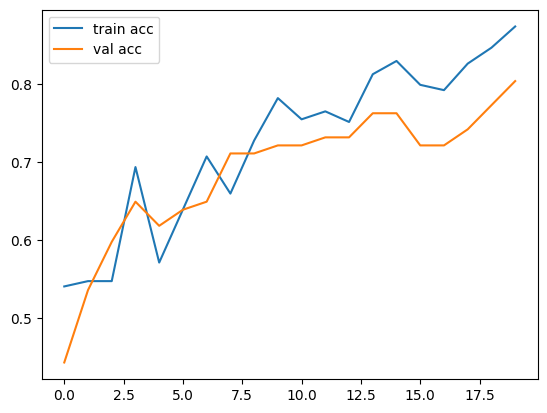

<Figure size 640x480 with 0 Axes>

In [21]:
# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
model.evaluate(test_set)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7914 - loss: 0.4472


[0.43511277437210083, 0.8041236996650696]

In [23]:
model.save('model.h5')

In [24]:
from tensorflow.keras.models import load_model

In [25]:
model = load_model("model.h5")

In [26]:
from tensorflow.keras.preprocessing import image

In [27]:
img=image.load_img('/content/img_p1_33.jpeg',target_size=(224,224))

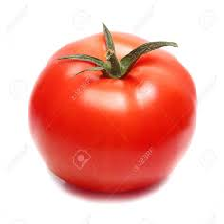

In [28]:
img

In [29]:
import numpy as np

In [30]:
x=image.img_to_array(img)
x=x/255

x=np.expand_dims(x,axis=0)
output = model.predict(x)
print(output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
[[0.7289499]]


In [31]:
x.shape

(1, 224, 224, 3)

In [32]:
output[0][0]

np.float32(0.7289499)

In [33]:
if output[0][0] >=0.5:
    prediction = 'Tomato'
    print(prediction)
else:
    prediction = 'Apple'
    print(prediction)

Tomato


In [34]:
!pip install flask flask-ngrok


In [44]:
from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# Load your trained model
model = load_model('/content/model.h5')

# Initialize Flask app
app = Flask(__name__)
run_with_ngrok(app)  # This will use ngrok to expose the app to the internet

# Image preprocessing function
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Resize image to match model's input shape
    img_array = image.img_to_array(img)  # Convert image to numpy array
    img_array = img_array / 255  # Rescale pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add an extra dimension for batch size (model expects this)
    return img_array

In [45]:
@app.route('/predict', methods=['POST'])
def predict():
    if 'file' not in request.files:
        return jsonify({"error": "No file part"}), 400
    file = request.files['file']
    if file.filename == '':
        return jsonify({"error": "No selected file"}), 400

    # Save the uploaded file temporarily
    img_path = '/tmp/' + file.filename
    file.save(img_path)

    # Prepare the image and make prediction
    img_array = prepare_image(img_path)
    prediction = model.predict(img_array)
    if prediction[0][0] >= 0.5:
        result = "Tomato"
    else:
        result = "Apple"

    return jsonify({"prediction": result})



In [46]:
# Run the Flask app
if __name__ == "__main__":
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-22:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 787, in urlopen
    response = self._make_request(
           